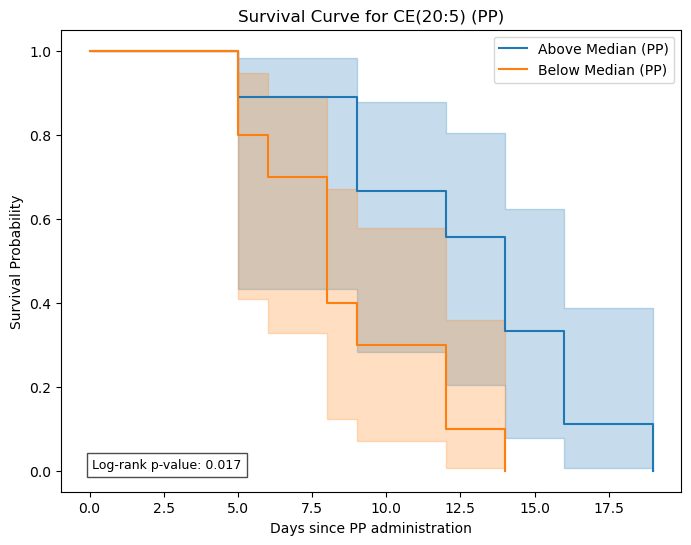

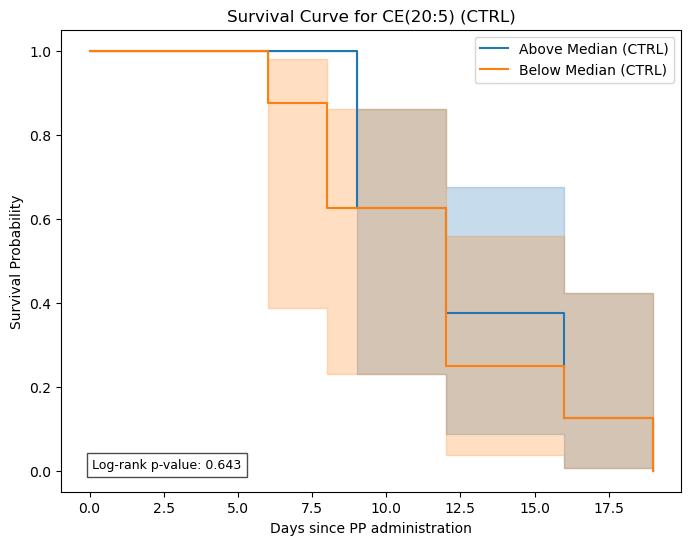

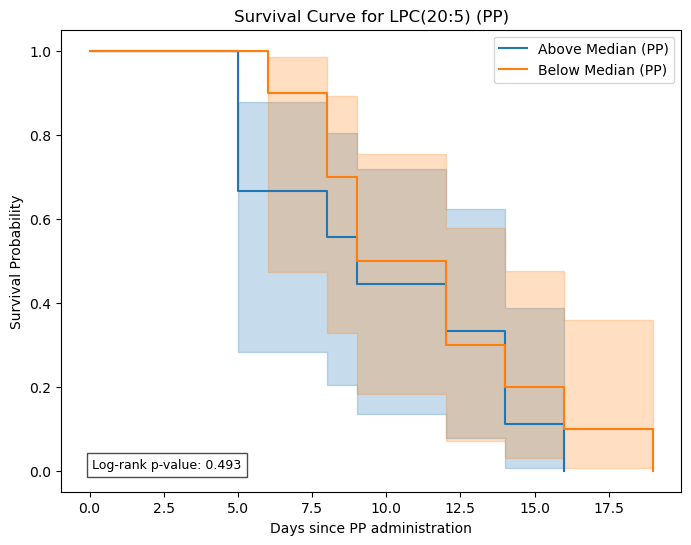

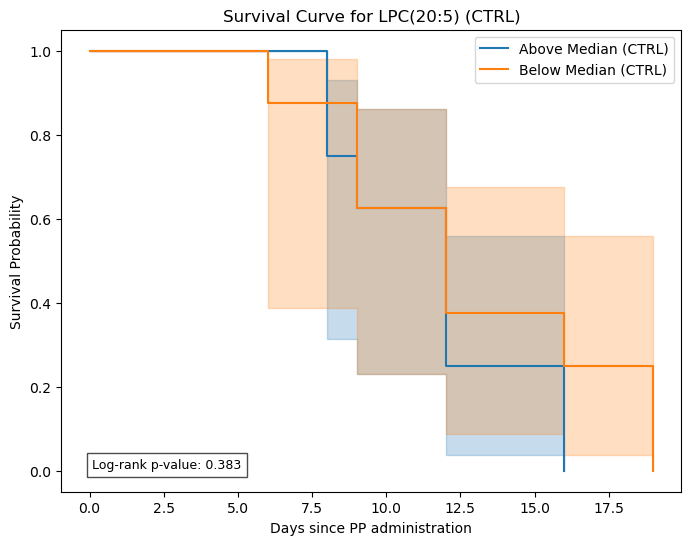

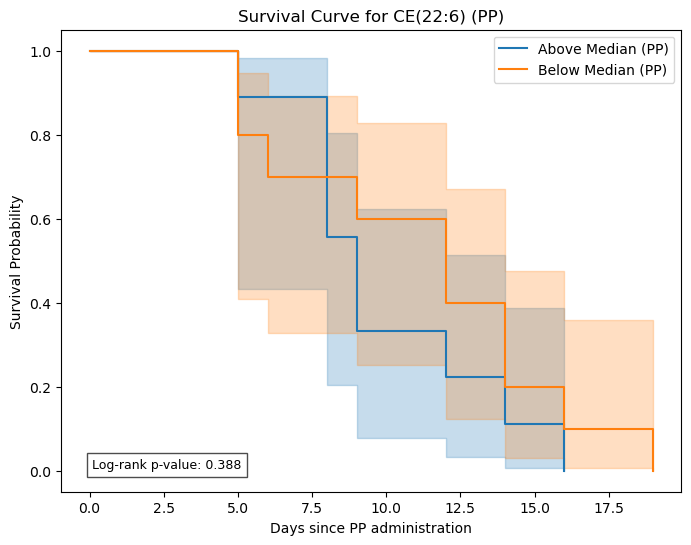

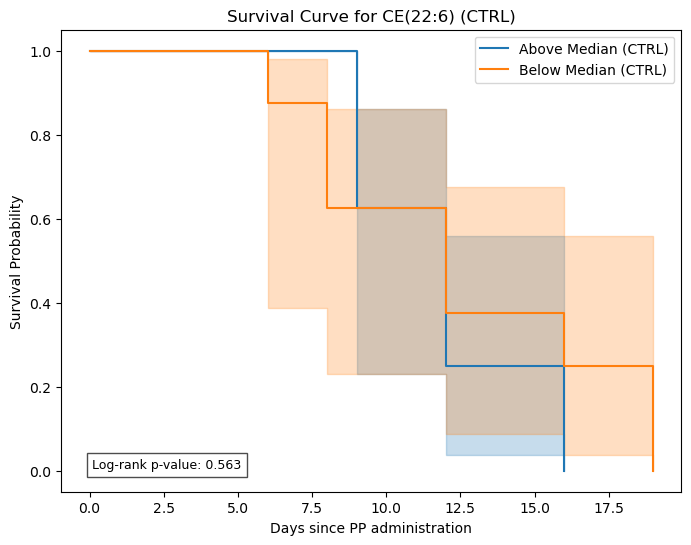

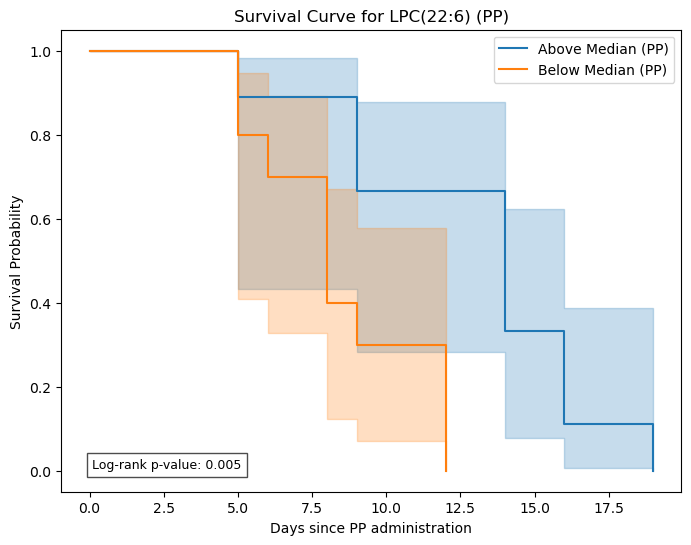

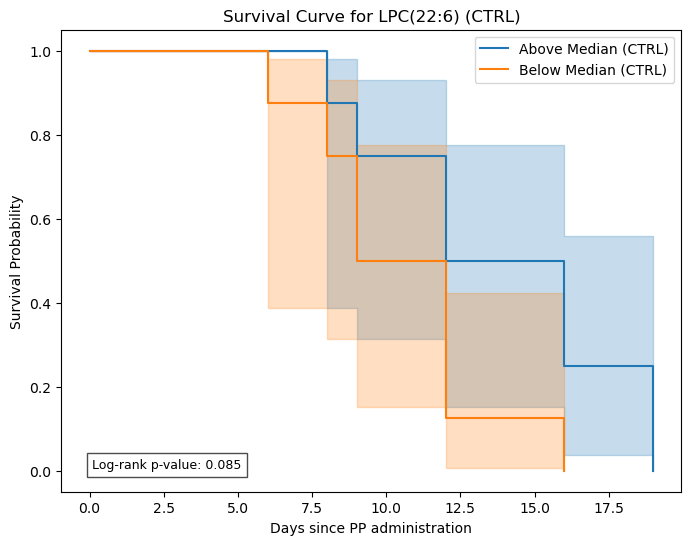

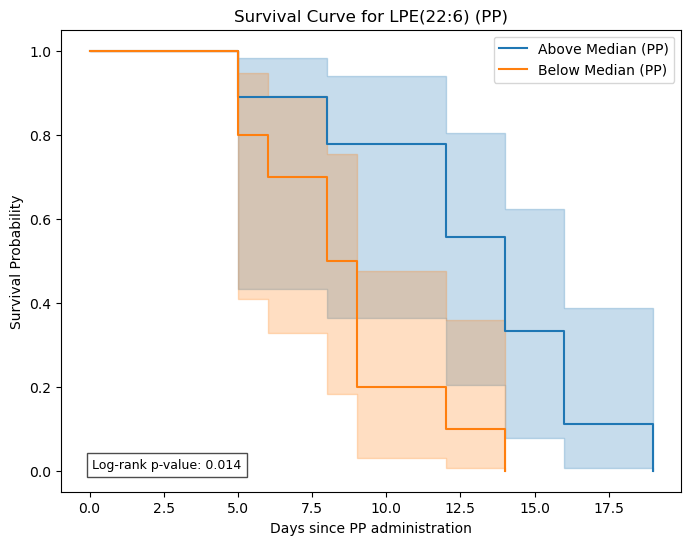

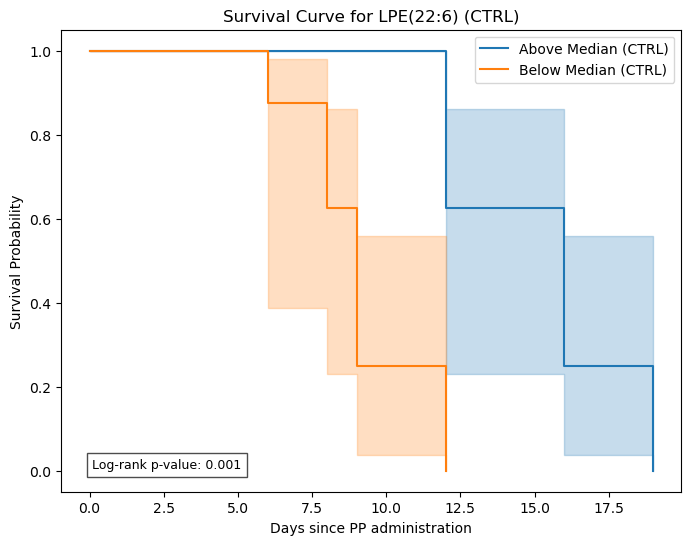

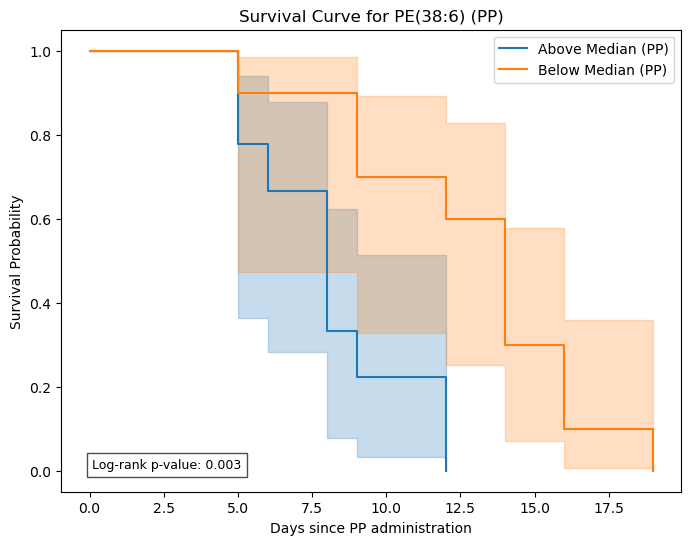

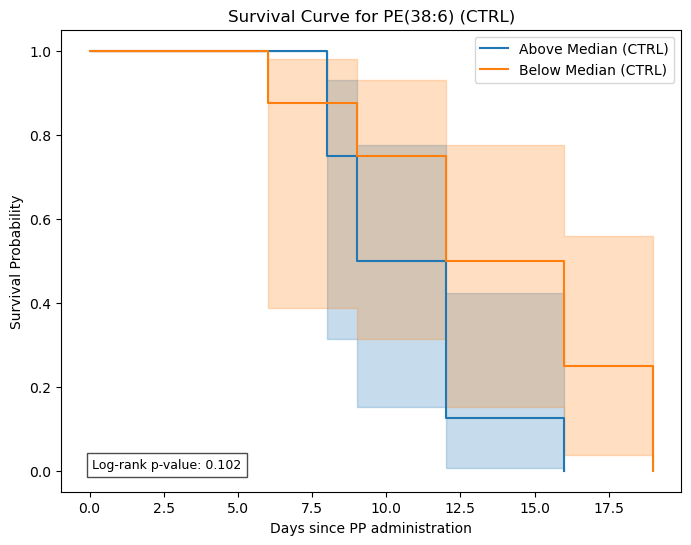

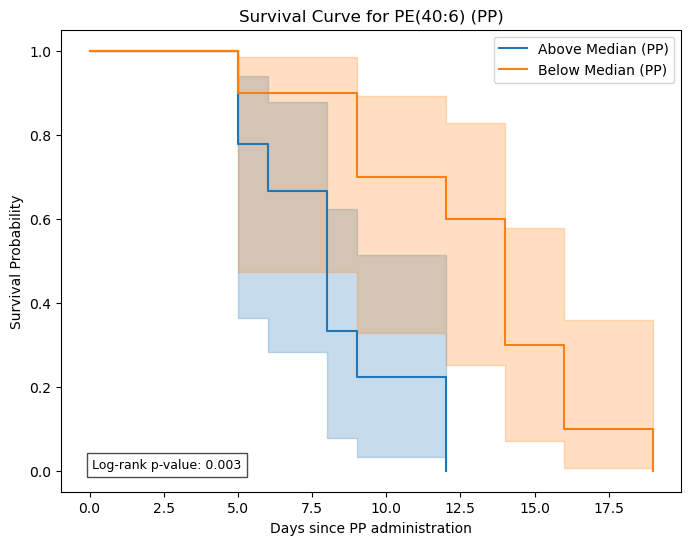

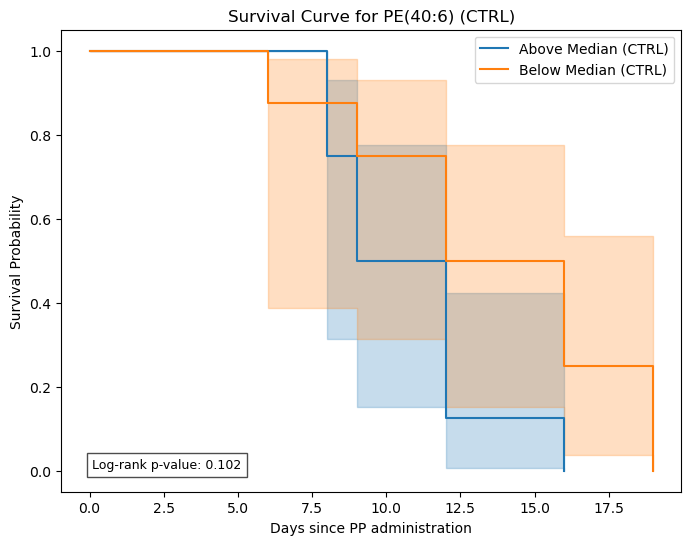

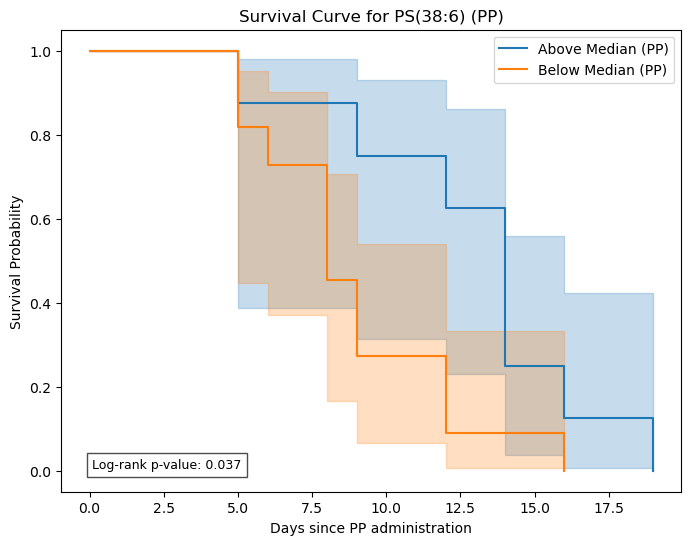

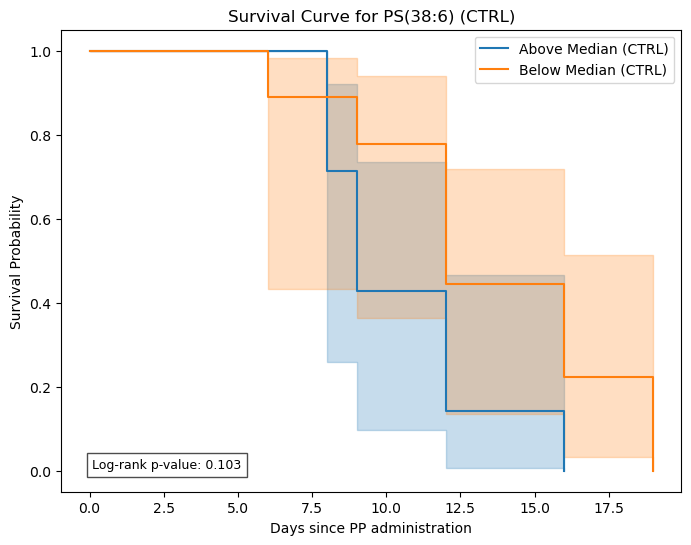

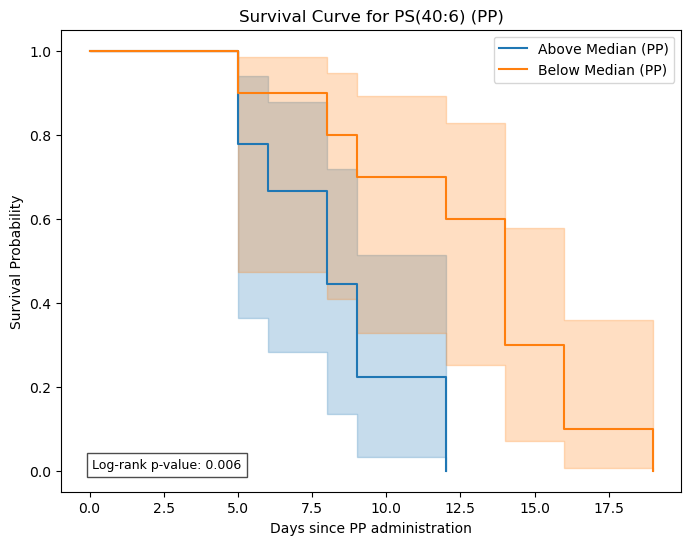

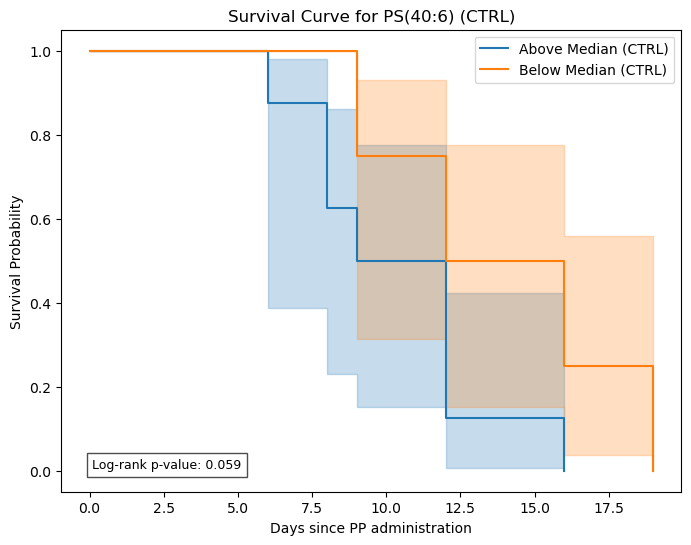

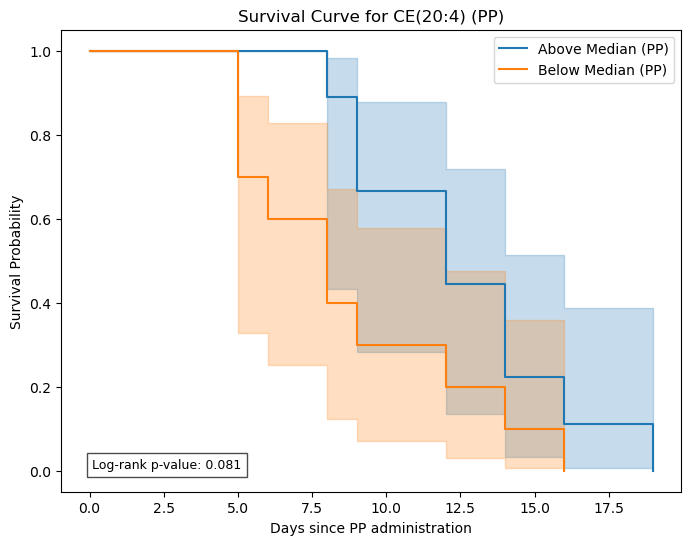

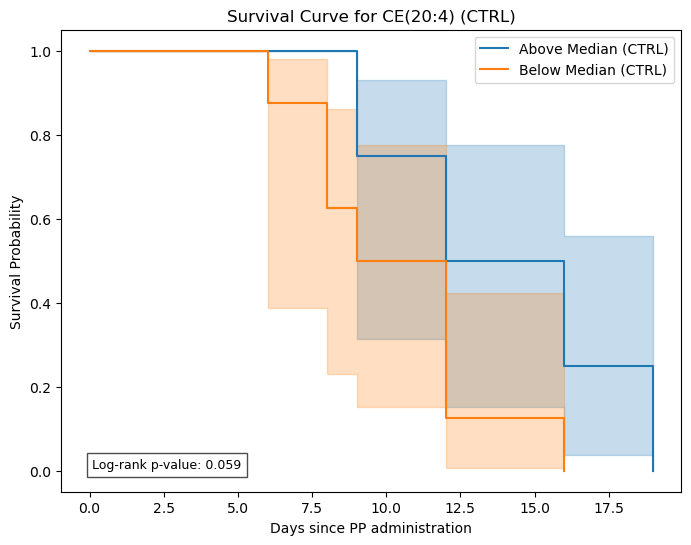

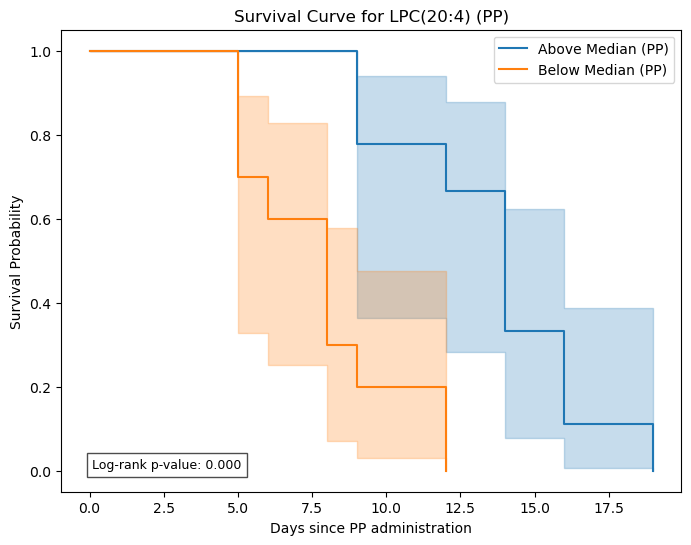

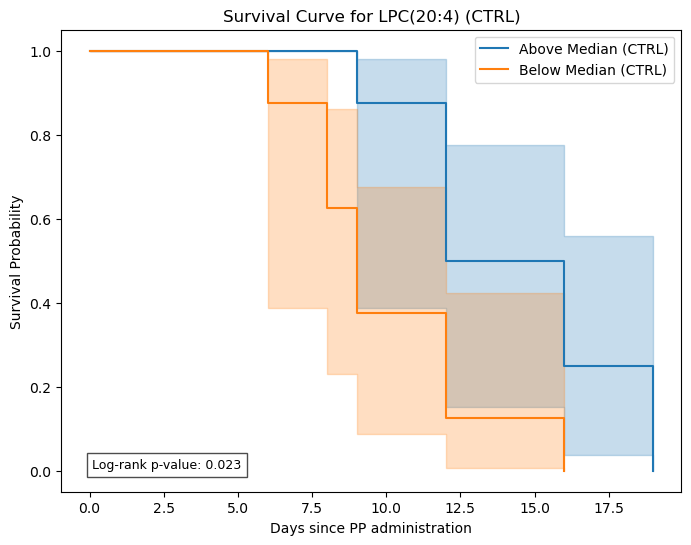

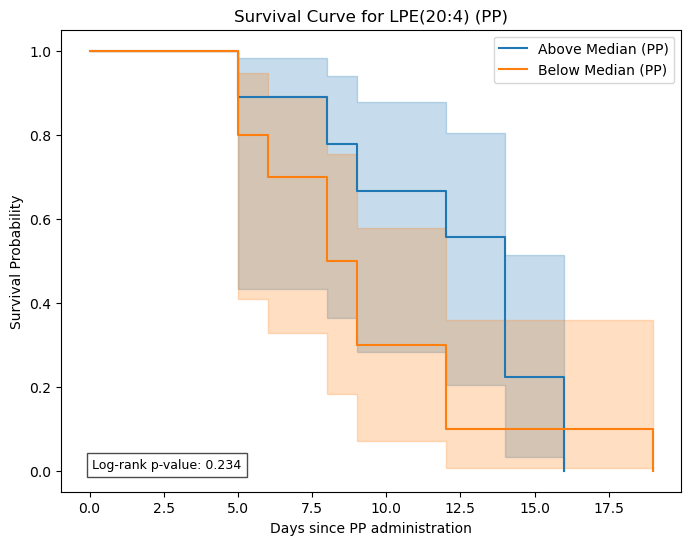

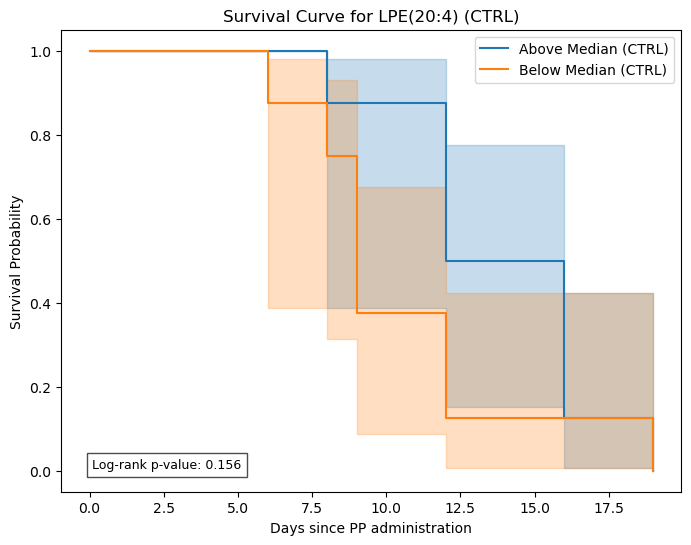

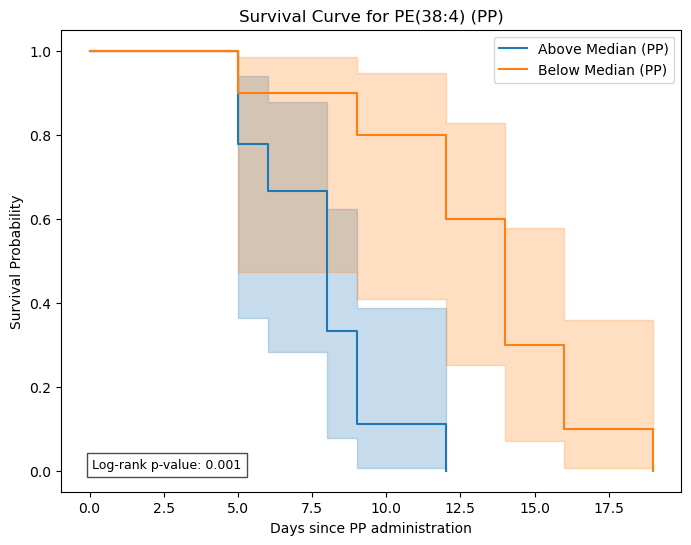

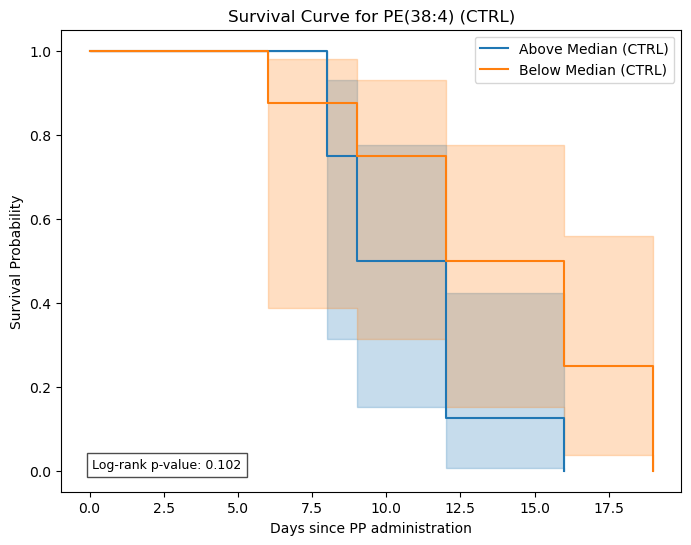

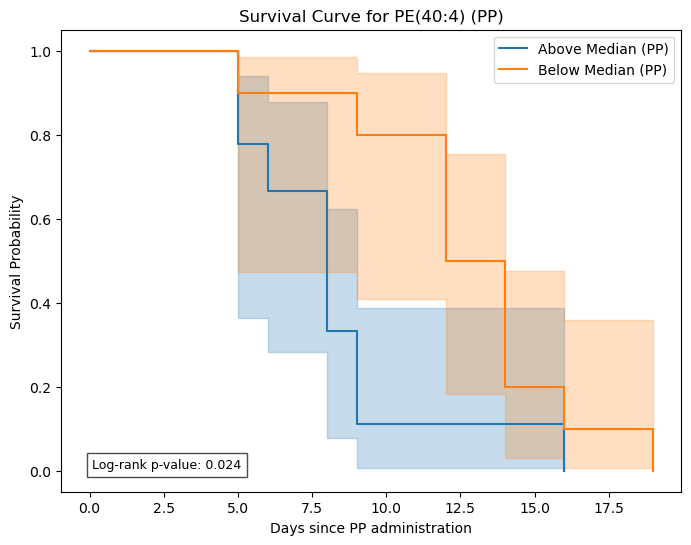

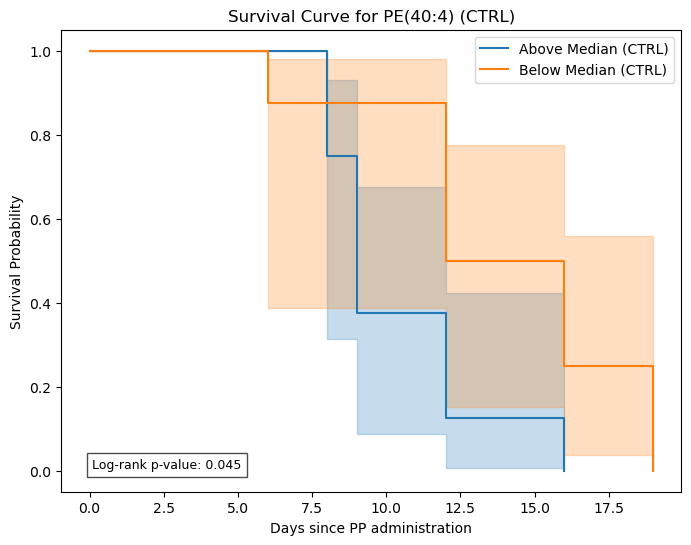

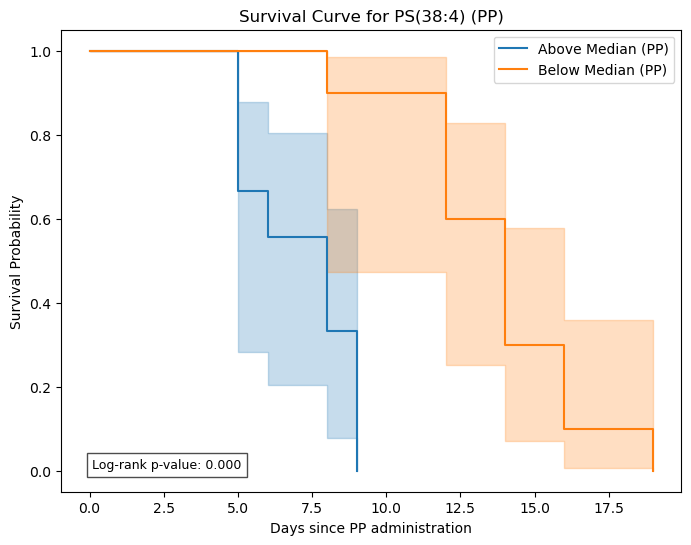

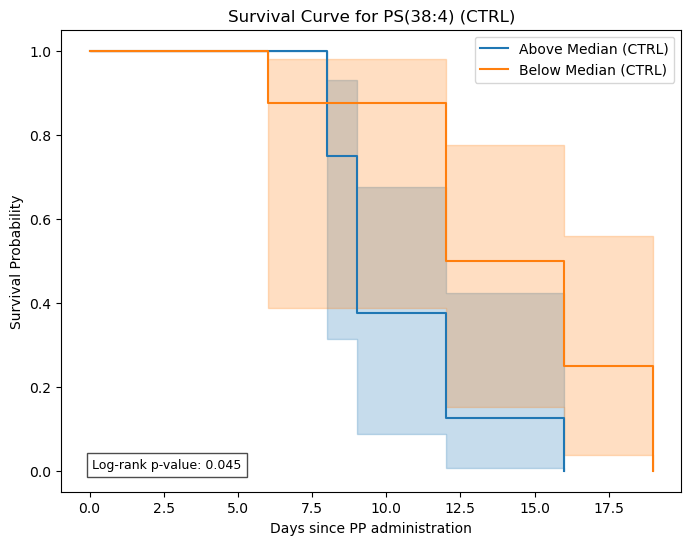

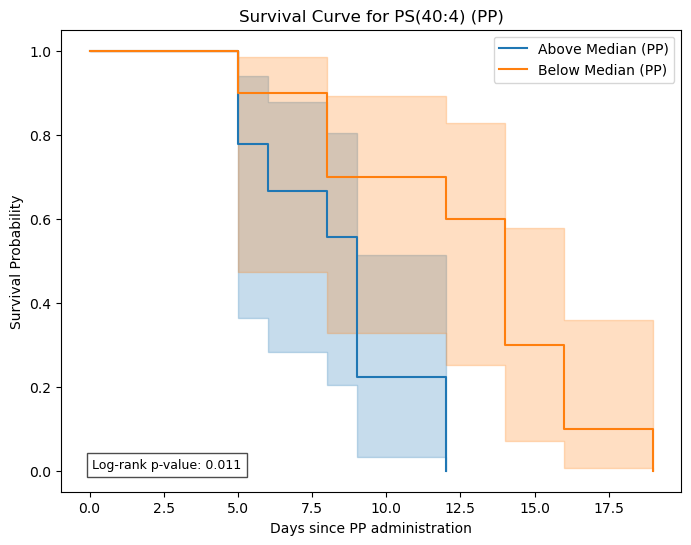

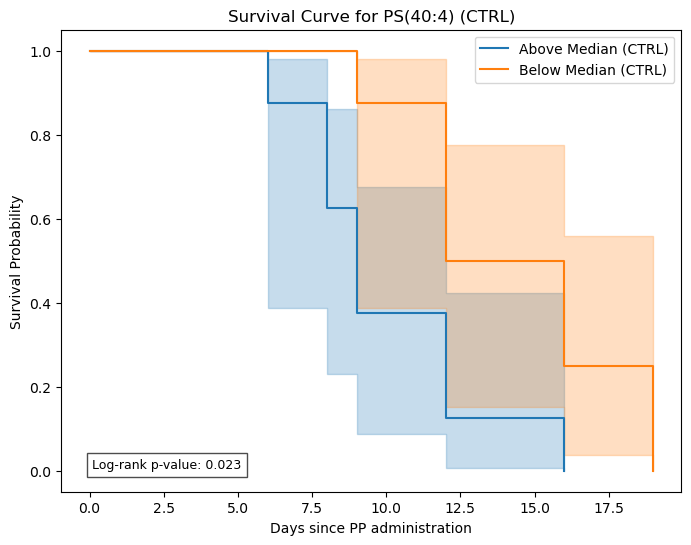

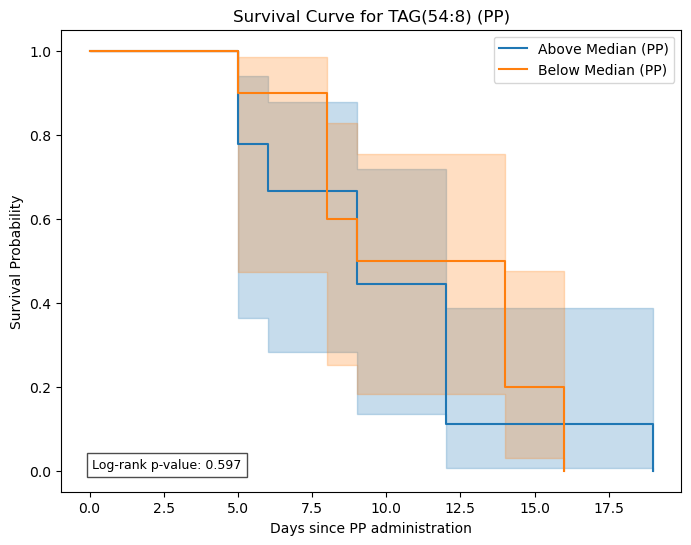

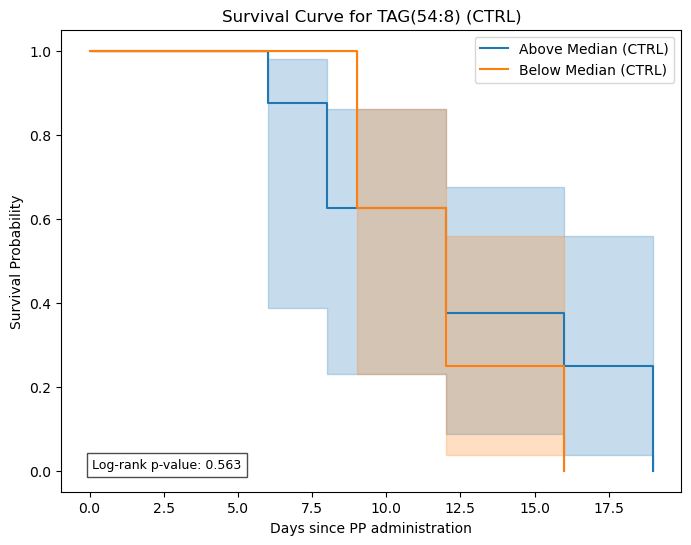

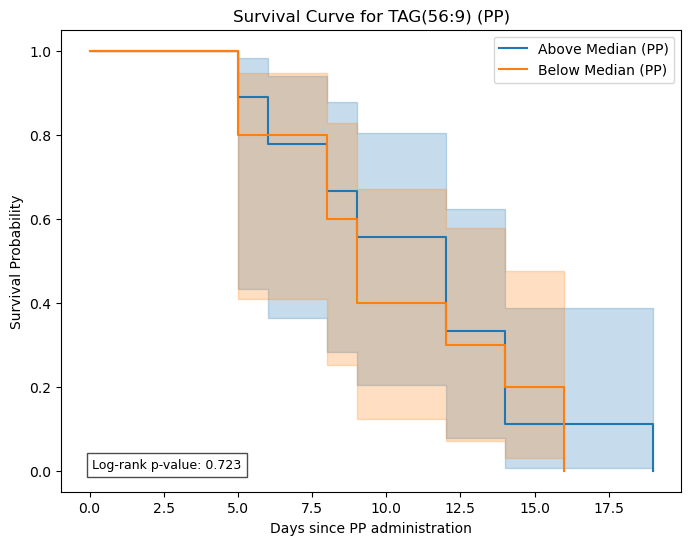

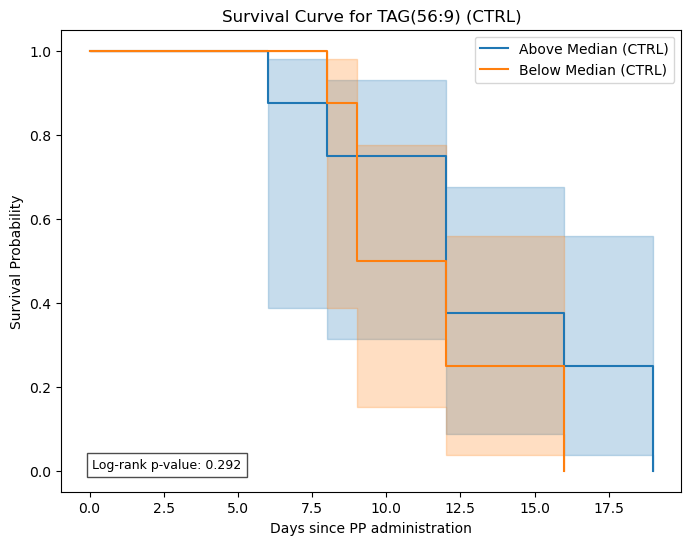

""


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from scipy.stats import shapiro, mannwhitneyu, ttest_ind

file_path = 'PUFA_serum_%mol.xlsx'
df = pd.read_excel(file_path)

# Split data into PP and CTRL groups based on the 'Group' column
pp_group = df[df['Group'] == 'PP']
ctrl_group = df[df['Group'] == 'CTRL']

df['Event'] = 1  # Assume all mice died (i.e., event occurred for all)

# Prepare list for potential statistical results (not used later in this version)
stat_results = []

# Select lipid columns (assuming they start at the 5th column)
lipids = df.columns[4:]

# Plot Kaplan-Meier curves for the PP group
def plot_km_for_pp(lipid):
    median_pp = pp_group[lipid].median()
    above_median_pp = pp_group[pp_group[lipid] > median_pp]
    below_median_pp = pp_group[pp_group[lipid] <= median_pp]

    # Perform log-rank test between above/below median groups
    results = logrank_test(above_median_pp['Number of days since PP administration'],
                           below_median_pp['Number of days since PP administration'],
                           event_observed_A=above_median_pp['Event'],
                           event_observed_B=below_median_pp['Event'])
    p_value_log = results.p_value

     # Plot survival curves
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(8, 6))
    
    kmf.fit(above_median_pp['Number of days since PP administration'], event_observed=above_median_pp['Event'])
    kmf.plot(label='Above Median (PP)')
    
    kmf.fit(below_median_pp['Number of days since PP administration'], event_observed=below_median_pp['Event'])
    kmf.plot(label='Below Median (PP)')

    # Annotate with p-value
    plt.text(0.05, 0.05, f'Log-rank p-value: {p_value_log:.3f}', transform=plt.gca().transAxes,
             fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

     # Sanitize lipid name for file naming
    safe_lipid_name = lipid.replace("(", "").replace(")", "").replace("/", "_").replace("\\", "_")


    plt.title(f"Survival Curve for {lipid} (PP)")
    plt.xlabel('Days since PP administration')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.savefig(f"KM_PP_{safe_lipid_name}.png", dpi=300, bbox_inches='tight')
    plt.show()

# Kaplan-Meier dla CTRL
def plot_km_for_ctrl(lipid):
    median_ctrl = ctrl_group[lipid].median()
    above_median_ctrl = ctrl_group[ctrl_group[lipid] > median_ctrl]
    below_median_ctrl = ctrl_group[ctrl_group[lipid] <= median_ctrl]
    
    results = logrank_test(above_median_ctrl['Number of days since PP administration'],
                           below_median_ctrl['Number of days since PP administration'],
                           event_observed_A=above_median_ctrl['Event'],
                           event_observed_B=below_median_ctrl['Event'])
    p_value_log = results.p_value
    
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(8, 6))
    
    kmf.fit(above_median_ctrl['Number of days since PP administration'], event_observed=above_median_ctrl['Event'])
    kmf.plot(label='Above Median (CTRL)')
    
    kmf.fit(below_median_ctrl['Number of days since PP administration'], event_observed=below_median_ctrl['Event'])
    kmf.plot(label='Below Median (CTRL)')
    
    plt.text(0.05, 0.05, f'Log-rank p-value: {p_value_log:.3f}', transform=plt.gca().transAxes,
             fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
    
    plt.title(f"Survival Curve for {lipid} (CTRL)")
    plt.xlabel('Days since PP administration')
    plt.ylabel('Survival Probability')
    plt.legend()
    #plt.savefig(f"KM_CTRL_{lipid}.png")
    plt.show()

for lipid in lipids:
    plot_km_for_pp(lipid)
    plot_km_for_ctrl(lipid)

# Tworzenie tabeli wyników
stat_results_df = pd.DataFrame(stat_results)
